In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('/content/BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
(df['Attrition_Flag'].value_counts()/df.shape[0])*100

,count
Attrition_Flag,
Existing Customer,83.934038
Attrited Customer,16.065962


In [6]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [7]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [8]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [9]:
df.drop(columns='CLIENTNUM',inplace=True)

In [10]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


<Axes: >

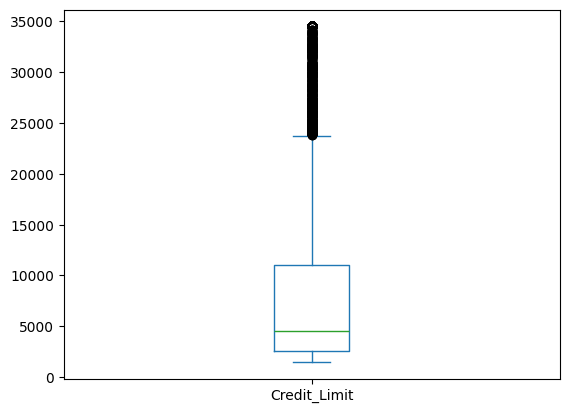

In [11]:
df['Credit_Limit'].plot(kind='box')

In [12]:
pd.set_option('display.max_rows', None)
df[df['Credit_Limit']>24000]['Credit_Limit'].sort_values()
pd.reset_option('display.max_rows')

In [13]:
df[df['Credit_Limit']==34516]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
45,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
61,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
65,Existing Customer,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,4,1,4,34516.0,1515,33001.0,0.592,1293,32,0.600,0.044
70,Existing Customer,51,M,4,Graduate,Single,$120K +,Blue,42,3,2,3,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,Existing Customer,45,M,2,Graduate,Single,$60K - $80K,Silver,33,4,2,2,34516.0,1529,32987.0,0.609,13940,105,0.810,0.044
10095,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10098,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,36,4,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
10110,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032


In [ ]:
# not actually outliers
# 34516 may be a standardized credit limit

<Axes: >

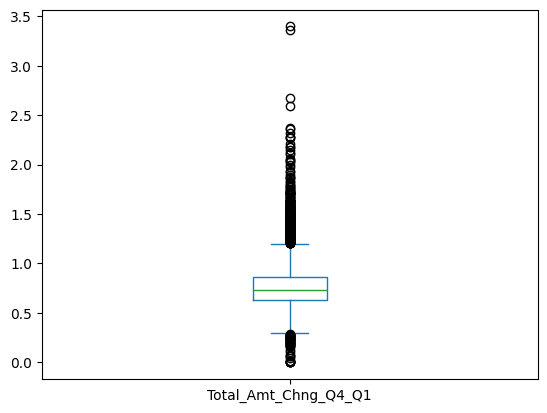

In [14]:
df['Total_Amt_Chng_Q4_Q1'].plot(kind='box')

In [15]:
pd.set_option('display.max_rows', None)
df[df['Total_Amt_Chng_Q4_Q1']>1.2]['Total_Amt_Chng_Q4_Q1'].sort_values()
pd.reset_option('display.max_rows', None)

In [ ]:
# not actually outliers

<Axes: >

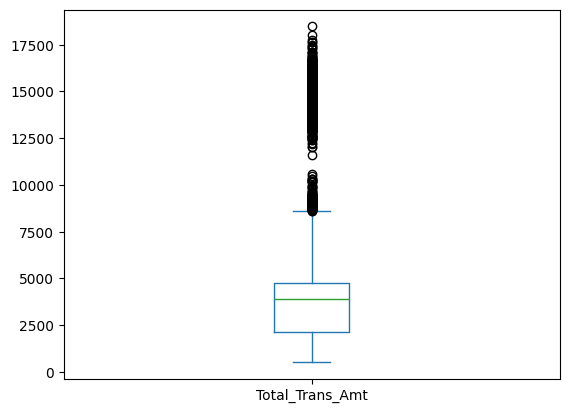

In [16]:
df['Total_Trans_Amt'].plot(kind='box')

In [17]:
pd.set_option('display.max_rows', None)
df[df['Total_Trans_Amt']>8500]['Total_Trans_Amt'].sort_values()
pd.reset_option('display.max_rows', None)

In [ ]:
# not actually outliers

<Axes: >

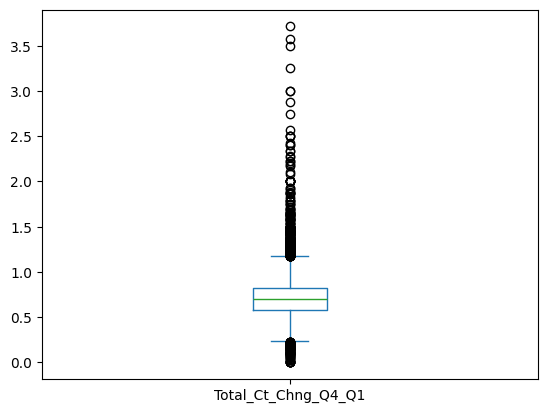

In [18]:
df['Total_Ct_Chng_Q4_Q1'].plot(kind='box')

In [19]:
pd.set_option('display.max_rows', None)
df[df['Total_Ct_Chng_Q4_Q1']>1.2]['Total_Ct_Chng_Q4_Q1'].sort_values()
pd.reset_option('display.max_rows', None)

In [ ]:
# not actually outliers

In [20]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [21]:
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [22]:
df.drop(columns=['Total_Trans_Amt','Total_Trans_Ct'],inplace=True)

In [23]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1.625,0.061,27.238095


In [24]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [25]:
df[['Education_Level','Attrition_Flag']].groupby('Education_Level')['Attrition_Flag'].value_counts()

Education_Level  Attrition_Flag   
College          Existing Customer     859
                 Attrited Customer     154
Doctorate        Existing Customer     356
                 Attrited Customer      95
Graduate         Existing Customer    2641
                 Attrited Customer     487
High School      Existing Customer    1707
                 Attrited Customer     306
Post-Graduate    Existing Customer     424
                 Attrited Customer      92
Uneducated       Existing Customer    1250
                 Attrited Customer     237
Unknown          Existing Customer    1263
                 Attrited Customer     256
Name: count, dtype: int64

In [ ]:
#  we can either impute unknown by mode(graduate) or random or encode as missing category
#  we will try all three using mlflow
#  covert doctorate and post-graduate to higher_education

In [26]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1.625,0.061,27.238095


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

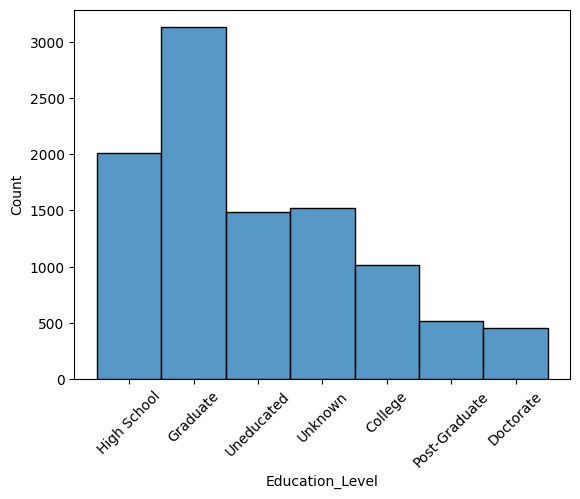

In [28]:
sns.histplot(data=df,x='Education_Level')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Education_Level'>

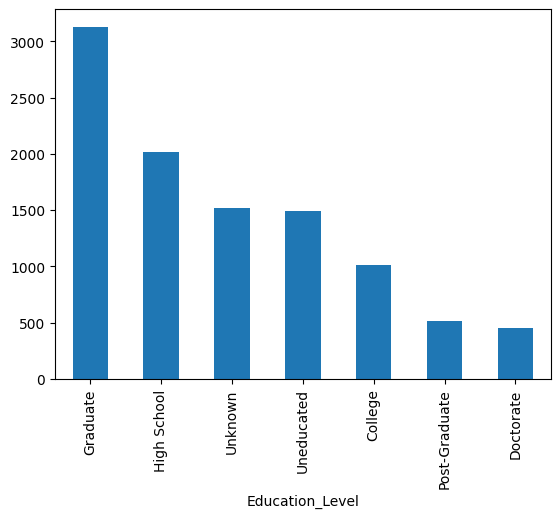

In [29]:
df['Education_Level'].value_counts().plot(kind='bar')

<Axes: xlabel='Education_Level'>

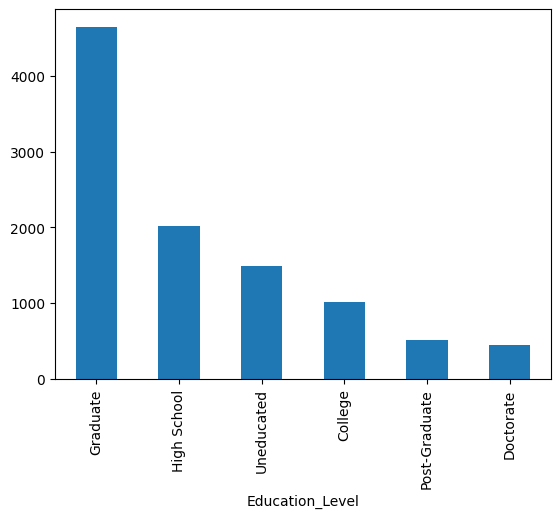

In [30]:
df['Education_Level'].replace({'Unknown':'Graduate'}).value_counts().plot(kind='bar')

In [31]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1.625,0.061,27.238095


In [32]:
df.drop(columns=['Months_on_book','Total_Revolving_Bal','Avg_Open_To_Buy'],inplace=True)

In [33]:
df.shape

(10127, 16)

In [34]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [35]:
df[['Avg_Utilization_Ratio','Avg_Transaction_Value']].corr()

,Avg_Utilization_Ratio,Avg_Transaction_Value
Avg_Utilization_Ratio,1.000000,-0.109116
Avg_Transaction_Value,-0.109116,1.000000


In [36]:
df[['Months_Inactive_12_mon','Contacts_Count_12_mon']].corr()

,Months_Inactive_12_mon,Contacts_Count_12_mon
Months_Inactive_12_mon,1.000000,0.029493
Contacts_Count_12_mon,0.029493,1.000000


In [40]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.6 MB/s eta 0:00:00


In [41]:
import mlflow

In [42]:
mlflow.is_tracking_uri_set()

False

In [37]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [38]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [39]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [43]:
df['Education_Level'].replace({'Unknown':np.nan,'Post-Graduate':'Higher_Education','Doctorate':'Higher_Education'},inplace=True)
df['Marital_Status'].replace({'Unknown':np.nan},inplace=True)
df['Income_Category'].replace({'Unknown':np.nan},inplace=True)


/tmp/ipython-input-2696860072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].replace({'Unknown':np.nan,'Post-Graduate':'Higher_Education','Doctorate':'Higher_Education'},inplace=True)
/tmp/ipython-input-2696860072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [44]:
df['Education_Level'].replace({'Higher_Education':'Advanced_Degree'},inplace=True)

In [ ]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [ ]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [ ]:
df['Income_Category'].isna().sum()

np.int64(1112)

In [ ]:
# unknown-> education_level,Marital_Status,Income_Category,

In [ ]:
# power transformer -> customer_age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,
# categorical_cols -> gender, Education_Level, Marital_Status, Income_Category,  Card_Category


In [ ]:
#  credit_limit. total_amt_change_q4_q4.   total_trans_amt.   total_ct_achange_q4_q1
# we will drop Total_Revolving_Bal and Avg_Open_To_Buy
# Avg_Transaction_Value = Total_Trans_Amt / Total_Trans_Ct

# SMOTE, RandomOver/Under -> sampling
# mlflow with and without [sampling,power transform,(drop customer_age or monthson_book and other cols)]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [46]:
X=df.iloc[:,1:]

In [48]:
X.shape

(10127, 15)

In [47]:
y = df.iloc[:,:1]

In [49]:
y.shape

(10127, 1)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [51]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [52]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [53]:
gender_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

education_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]))
])

marital_income_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [54]:
preprocessor = ColumnTransformer(transformers=[
    ('gender',gender_pipe,['Gender']),
    ('education',education_pipe,['Education_Level']),
    ('marital_income',marital_income_pipe,['Marital_Status','Income_Category']),
    ('encoding_card',OneHotEncoder(drop='first',handle_unknown='ignore'),['Card_Category']),
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])


],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False)

In [55]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('gender',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Gender']),
                                ('education',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  Ordin...
                                 ['Marital_Status', 'Income_Category']),
                                ('encoding_card',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Card_Category']),
                                ('power_transform', PowerTransformer(),
                                 ['Customer_Age', 'Dependent_count',
                                  'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio',
                                  'Avg_Transaction_Value'])])

In [ ]:
# preprocessor.get_params()

In [56]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [ ]:
# X_train

In [66]:
y_train

In [64]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)


attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_le = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_le = y_test['Attrition_Flag'].map(attrition_mapping)


In [71]:
X_train_trans

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [73]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8819898777928651
Precision: 0.7415730337078652
Recall: 0.40615384615384614
F1 Score: 0.5248508946322068
ROC-AUC: 0.8514416431972673

=== Test Performance ===
Accuracy: 0.8795656465942744
Precision: 0.7610062893081762
Recall: 0.37003058103975534
F1 Score: 0.49794238683127573
ROC-AUC: 0.8328590482258857




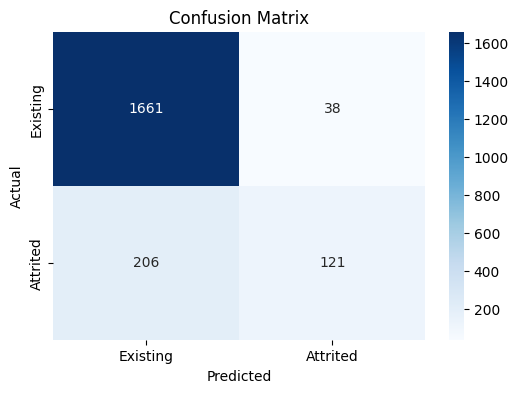

In [80]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Existing', 'Attrited']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# [[TN, FP],
#  [FN, TP]]

In [ ]:
# TN (True Negatives = 1661) → The model correctly predicted “Existing Customer” (not churn).

# FP (False Positives = 38) → The model predicted churn, but actually it was an Existing Customer (false alarm).

# FN (False Negatives = 206) → The model predicted Existing Customer, but actually the customer was churned (missed churner).

# TP (True Positives = 121) → The model correctly predicted churn (Attrited Customer).

In [82]:
mlflow.is_tracking_uri_set()

False

In [83]:
%pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00


In [84]:
import dagshub
dagshub.init(repo_owner='Ranjan113', repo_name='credit-card-churn', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=a7bc287f-97ae-45eb-8bdf-0a69e2d2f721&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=894e38c68989d7c954a2d3a190f1b297794785c47b12a6384c878e8124036b51




Accessing as Ranjan113

Initialized MLflow to track repo "Ranjan113/credit-card-churn"

Repository Ranjan113/credit-card-churn initialized!

In [85]:
import mlflow

In [86]:
mlflow.set_tracking_uri("https://dagshub.com/Ranjan113/credit-card-churn.mlflow")

In [89]:
mlflow.set_experiment("Exp. 1 - Trying different Imputing techniques")


2025/09/05 06:38:01 INFO mlflow.tracking.fluent: Experiment with name 'Exp. 1 - Trying different Imputing techniques' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/bcf5a164c9594b0fb6dcf65b3e52d6a9', creation_time=1757054281685, experiment_id='2', last_update_time=1757054281685, lifecycle_stage='active', name='Exp. 1 - Trying different Imputing techniques', tags={}>

In [90]:
print("Tracking URI:", mlflow.get_tracking_uri())


Tracking URI: https://dagshub.com/Ranjan113/credit-card-churn.mlflow


In [91]:
X=df.iloc[:,1:]

In [92]:
X.shape

(10127, 15)

In [93]:
y = df.iloc[:,:1]

In [94]:
y.shape

(10127, 1)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [96]:
gender_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
])

education_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]))
])

marital_income_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))
])

In [97]:
preprocessor = ColumnTransformer(transformers=[
    ('gender',gender_pipe,['Gender']),
    ('education',education_pipe,['Education_Level']),
    ('marital_income',marital_income_pipe,['Marital_Status','Income_Category']),
    ('encoding_card',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Card_Category']),
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])


],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('gender',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender']),
                                ('education',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'...
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Card_Category']),
                                ('power_transform', PowerTransformer(),
                                 ['Customer_Age', 'Dependent_count',
                                  'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio',
                                  'Avg_Transaction_Value'])])

In [98]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_le = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_le = y_test['Attrition_Flag'].map(attrition_mapping)

In [99]:
y_train_le

,Attrition_Flag
9066,0
5814,1
792,0
1791,0
5011,0
...,...
5734,1
5191,1
5390,0
860,0


In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [101]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8819898777928651
Precision: 0.7415730337078652
Recall: 0.40615384615384614
F1 Score: 0.5248508946322068
ROC-AUC: 0.8514416431972673

=== Test Performance ===
Accuracy: 0.8795656465942744
Precision: 0.7610062893081762
Recall: 0.37003058103975534
F1 Score: 0.49794238683127573
ROC-AUC: 0.8328590482258857




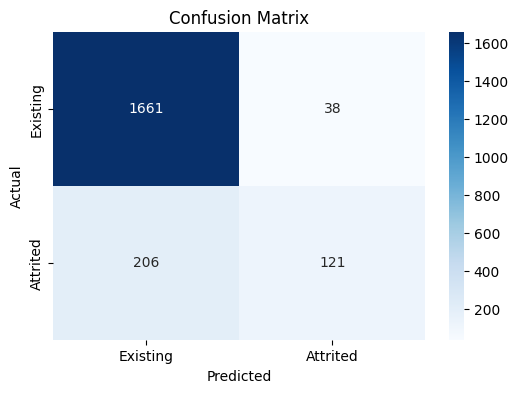

In [104]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Existing', 'Attrited']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [108]:
# our performance is bad
# recall is not good

In [105]:
# log experiment

with mlflow.start_run(run_name="Imputing using Mode"):

    mlflow.log_param("experiment_type","Imputing using Mode")


    mlflow.log_params(lr.get_params())

    mlflow.log_metric("train_accuracy", accuracy_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_precision", precision_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_recall", recall_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_f1", f1_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_roc_auc", roc_auc_score(y_train_le, y_train_proba))

    mlflow.log_metric("test_accuracy", accuracy_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_precision", precision_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_recall", recall_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_f1", f1_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_roc_auc", roc_auc_score(y_test_le, y_test_proba))

    cm = confusion_matrix(y_test_le, y_pred_test)
    labels = ['Existing', 'Attrited']

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    plt.close()

    mlflow.log_artifact(cm_path)

🏃 View run Imputing using Mode at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2/runs/0ba643ff82c04ff2bc641d91811373b1
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2


In [ ]:
def data_cleaning(data: pd.DataFrame):
  data['Avg_Transaction_Value'] = data['Total_Trans_Amt'] / data['Total_Trans_Ct']
  return (
      data
      .drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
      .drop(columns='CLIENTNUM')
      .drop(columns=['Total_Trans_Amt','Total_Trans_Ct'])
      .drop(columns=['Total_Revolving_Bal','Avg_Open_To_Buy','Months_on_book'])
      .drop(columns='Months_on_book')
  )